In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
# load impressions for 2022
df_q2 = pd.read_csv('../datasets/impressions_q2_extended.csv')
df_q3 = pd.read_csv('../datasets/impressions_q3_extended.csv')

dfs = [df_q2, df_q3]
impressions_df = pd.concat(dfs)

# process date
impressions_df['date'] = impressions_df['first_event_at_iso'].apply(lambda x: np.datetime64(x))
impressions_df

/home/markopejic/clear/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if __name__ == '__main__':


,id,hostname,placement_ids,ad_width_chosen,ad_height_chosen,first_event_at_iso,is_fixated,gaze_valid,total_fixation_duration,date
0,f69b3c26-9fc6-4fb0-91d1-f046cb6fca98,tripadvisor.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",728,90,2022-06-05T02:01:59.906Z,False,False,0,2022-06-05 02:01:59.906
1,80fb9207-b5a5-4a4e-81e1-66ed6d42cdf0,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-06-05T02:02:17.540Z,False,False,0,2022-06-05 02:02:17.540
2,9539852a-40ec-4512-90e4-855759e7f266,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-06-05T02:04:32.557Z,False,False,0,2022-06-05 02:04:32.557
3,274f9e27-21f0-4c32-941e-b7e54372deda,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",300,250,2022-06-05T02:07:40.976Z,False,False,0,2022-06-05 02:07:40.976
4,1662e1e0-52c7-4df9-9c4b-289f061dc2f1,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-06-05T02:09:27.123Z,False,False,0,2022-06-05 02:09:27.123
...,...,...,...,...,...,...,...,...,...,...
5033831,910d7681-9d6b-4b31-b2ed-ab4b9160f233,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:57.326Z,False,True,0,2022-08-31 20:46:57.326
5033832,9828ccc8-bd97-4590-a5a9-15b4f7c717aa,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:37:44.176Z,True,True,1948,2022-08-31 20:37:44.176
5033833,c66d8adf-a889-4d6a-baac-02fc59749a06,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:20.270Z,False,False,0,2022-08-31 20:46:20.270
5033834,e0635eac-65a8-4c42-8b53-304722695f58,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:50:34.886Z,False,False,0,2022-08-31 20:50:34.886


In [3]:
# load TRE dataset
df_client_tre = pd.read_csv('../datasets/tre_data.csv')
df_client_tre['Date'] = df_client_tre['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
print(df_client_tre['Campaign'].value_counts())
df_client_tre

3-Consumer - 2022 - ALWAYS ON PERFORMANCE       117126
3-Consumer-2022-N6_Apple_NPI_iPhonelansering     14633
Name: Campaign, dtype: int64


,Site (CM360),Campaign,Date,Domain,Placement ID,Creative Pixel Size,Impressions,Clicks,Active View: % Viewable Impressions,Active View: Average Viewable Time (Seconds)
0,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,adnxs.com,325242770,980x240,168,0,81.55,22.34
1,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,adnxs.com,325488187,320x320,7463,24,72.18,8.83
2,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,adsenseformobileapps.com,325488187,320x320,20,0,60.00,5.96
3,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,advnture.com,325488184,300x600,1,0,0.00,0.00
4,DBM 3 SE DV360 1565968848-Tre Sverige,3-Consumer - 2022 - ALWAYS ON PERFORMANCE,2022-07-01,advnture.com,325488874,300x250,4,0,75.00,9.36
...,...,...,...,...,...,...,...,...,...,...
131754,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-28,snapchat.com,345089502,1x1,0,899,0.00,0.00
131755,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-29,(not set),345089502,1x1,0,80,0.00,0.00
131756,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-29,snapchat.com,345089502,1x1,0,1097,0.00,0.00
131757,snapchat.com,3-Consumer-2022-N6_Apple_NPI_iPhonelansering,2022-09-30,(not set),345089502,1x1,0,50,0.00,0.00


In [4]:
df_client_tre['Creative Pixel Size'].value_counts()

300x250    29354
320x320    24305
300x600    18030
980x240    17411
980x300    15525
250x360    12180
250x600     9817
320x480     2508
980x600     2304
320x400      182
1x1          143
Name: Creative Pixel Size, dtype: int64

In [9]:
# add area into df_client_tre data
def calculate_area(row):
    parts = row['Creative Pixel Size'].split('x')
    width = int(parts[0])
    height = int(parts[1])
    return width * height
    
df_client_tre['area'] = df_client_tre.apply(lambda x: calculate_area(x), axis=1)
df_client_tre = df_client_tre[df_client_tre['area'] != 1]
tre_areas = df_client_tre['area'].unique()

In [10]:
df_client_tre['Campaign'].value_counts()

3-Consumer - 2022 - ALWAYS ON PERFORMANCE    117123
Name: Campaign, dtype: int64

In [7]:
# filter specific campaign
campaign = '3-Consumer - 2022 - ALWAYS ON PERFORMANCE'
df_client_tre = df_client_tre[df_client_tre['Campaign'] == campaign]
print(df_client_tre.shape)

campaign_dates = list(df_client_tre['Date'].unique())
print(campaign_dates)

(117123, 11)
[numpy.datetime64('2022-07-01T00:00:00.000000000'), numpy.datetime64('2022-07-02T00:00:00.000000000'), numpy.datetime64('2022-07-03T00:00:00.000000000'), numpy.datetime64('2022-07-04T00:00:00.000000000'), numpy.datetime64('2022-07-05T00:00:00.000000000'), numpy.datetime64('2022-07-06T00:00:00.000000000'), numpy.datetime64('2022-07-07T00:00:00.000000000'), numpy.datetime64('2022-07-08T00:00:00.000000000'), numpy.datetime64('2022-07-09T00:00:00.000000000'), numpy.datetime64('2022-07-10T00:00:00.000000000'), numpy.datetime64('2022-07-11T00:00:00.000000000'), numpy.datetime64('2022-07-12T00:00:00.000000000'), numpy.datetime64('2022-07-13T00:00:00.000000000'), numpy.datetime64('2022-07-14T00:00:00.000000000'), numpy.datetime64('2022-07-15T00:00:00.000000000'), numpy.datetime64('2022-07-16T00:00:00.000000000'), numpy.datetime64('2022-07-17T00:00:00.000000000'), numpy.datetime64('2022-07-18T00:00:00.000000000'), numpy.datetime64('2022-07-19T00:00:00.000000000'), numpy.datetime64(

In [8]:
# filter only Tre hostnames
tre_hostnames = df_client_tre['Domain'].unique()
impressions_df = impressions_df[impressions_df['hostname'].isin(tre_hostnames)]

# filter only impressions in date range of specific campaign
start_date = min(campaign_dates)
end_date = max(campaign_dates)
print(start_date)
print(end_date)
impressions_df = impressions_df.loc[(impressions_df['date'] >= start_date) & (impressions_df['date'] <= end_date)]

# impressions_df = pd.read_csv('../datasets/impressions_12.csv')
impressions_df

2022-07-01T00:00:00.000000000
2022-09-30T00:00:00.000000000


,id,hostname,placement_ids,ad_width_chosen,ad_height_chosen,first_event_at_iso,is_fixated,gaze_valid,total_fixation_duration,date
0,ff4e6e97-69f5-41d0-bf70-c2f385c2a60f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",185,205,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965
1,25a66e58-c2d2-4d31-9246-0429d20f596f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965
2,4aaffec1-8536-4e5e-9d85-c26c044025ac,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:40:54.776Z,False,False,0,2022-08-18 18:40:54.776
3,cf3ddec1-e3ab-4d62-b23a-806c412cc3f8,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:55:34.205Z,False,False,0,2022-08-18 18:55:34.205
4,63979287-5537-4638-8788-f4c3639f1ab5,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",1180,240,2022-08-18T13:07:20.163Z,False,False,0,2022-08-18 13:07:20.163
...,...,...,...,...,...,...,...,...,...,...
5033831,910d7681-9d6b-4b31-b2ed-ab4b9160f233,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:57.326Z,False,True,0,2022-08-31 20:46:57.326
5033832,9828ccc8-bd97-4590-a5a9-15b4f7c717aa,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:37:44.176Z,True,True,1948,2022-08-31 20:37:44.176
5033833,c66d8adf-a889-4d6a-baac-02fc59749a06,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:20.270Z,False,False,0,2022-08-31 20:46:20.270
5033834,e0635eac-65a8-4c42-8b53-304722695f58,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:50:34.886Z,False,False,0,2022-08-31 20:50:34.886


In [97]:
df_client_tre['Date'].value_counts()

2022-09-15    1452
2022-09-19    1451
2022-09-16    1441
2022-09-21    1424
2022-09-14    1419
              ... 
2022-09-10    1131
2022-07-01    1127
2022-07-02    1069
2022-07-03    1052
2022-07-31    1047
Name: Date, Length: 92, dtype: int64

In [98]:
# adding size column
def get_impression_size(row):
    return f"{row['ad_width_chosen']}x{row['ad_height_chosen']}"

def get_impression_area(row):
    return row['ad_width_chosen'] * row['ad_height_chosen']

impressions_df['size'] = impressions_df.apply(lambda x: get_impression_size(x), axis=1)
impressions_df['area'] = impressions_df.apply(lambda x: get_impression_area(x), axis=1)
impressions_df

,id,hostname,placement_ids,ad_width_chosen,ad_height_chosen,first_event_at_iso,is_fixated,gaze_valid,total_fixation_duration,date,size,area
0,ff4e6e97-69f5-41d0-bf70-c2f385c2a60f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",185,205,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965,185x205,37925
1,25a66e58-c2d2-4d31-9246-0429d20f596f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965,180x150,27000
2,4aaffec1-8536-4e5e-9d85-c26c044025ac,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:40:54.776Z,False,False,0,2022-08-18 18:40:54.776,468x120,56160
3,cf3ddec1-e3ab-4d62-b23a-806c412cc3f8,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:55:34.205Z,False,False,0,2022-08-18 18:55:34.205,468x120,56160
4,63979287-5537-4638-8788-f4c3639f1ab5,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",1180,240,2022-08-18T13:07:20.163Z,False,False,0,2022-08-18 13:07:20.163,1180x240,283200
...,...,...,...,...,...,...,...,...,...,...,...,...
5033831,910d7681-9d6b-4b31-b2ed-ab4b9160f233,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:57.326Z,False,True,0,2022-08-31 20:46:57.326,180x150,27000
5033832,9828ccc8-bd97-4590-a5a9-15b4f7c717aa,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:37:44.176Z,True,True,1948,2022-08-31 20:37:44.176,468x120,56160
5033833,c66d8adf-a889-4d6a-baac-02fc59749a06,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:20.270Z,False,False,0,2022-08-31 20:46:20.270,180x150,27000
5033834,e0635eac-65a8-4c42-8b53-304722695f58,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:50:34.886Z,False,False,0,2022-08-31 20:50:34.886,468x120,56160


In [99]:
import json

def extract_pid(placement_id):
    placement_id = json.loads(placement_id)
#     print(placement_id)
    bam_ad_slots = placement_id["bam_ad_slot"]
    final_bam_ad_slots = [bas for bas in bam_ad_slots if bas.strip() != '']
    try:
        ret = placement_id['tag_id'][0]
    except:
#         print('empty pid')
        return
    ret += ','.join([bas for bas in final_bam_ad_slots])
    return ret
    
def len_pids(placement_id):
    placement_id = json.loads(placement_id)
    bam_ad_slots = placement_id["bam_ad_slot"]
    final_bam_ad_slots = [bas for bas in bam_ad_slots if bas.strip() != '']
    return len(placement_id["tag_id"]) + len(final_bam_ad_slots)

def pid_type(pid):
    try:
        int(pid)
        return 'int'
    except:
        return 'str'

impressions_df['pid'] = impressions_df['placement_ids'].apply(extract_pid)
impressions_df['pid_len'] = impressions_df['placement_ids'].apply(len_pids)
impressions_df['pid_type'] = impressions_df['pid'].apply(pid_type)

In [100]:
# filter only impressions with int placement IDs
# impressions_df = impressions_df[impressions_df['pid_type'] == 'int']
# impressions_df['pid'] = impressions_df['pid'].apply(lambda pid: int(pid))
# impressions_df.head()

In [101]:
# run through predictions
import os
import json

def _get_pred_map():
    pred_map = dict()
    
    for i in range(1, 13):
        if i < 10:
            i = f'0{i}'
        for day in os.listdir(f'../predictions/2022/{i}'):
            for h in os.listdir(f'../predictions/2022/{i}/{day}'):
                if not h.endswith('.ndjson'):
                    continue
                with open(f'../predictions/2022/{i}/{day}/{h}')as f:
                    for line in f.readlines():
                        json_line = json.loads(line)
                        id_ = json_line['id']
                        pred_map[id_] = json_line['prediction']
    return pred_map
                            
pred_map = _get_pred_map()

In [102]:
def _get_final_fixation(gaze_valid, is_fixated, id_, pred_map):
    if gaze_valid:
        return is_fixated
    if id_ in pred_map:
        return pred_map[id_]
    return False

impressions_df['final_fixation'] = impressions_df.apply(lambda row: _get_final_fixation(row['gaze_valid'], row['is_fixated'], row['id'], pred_map), axis=1)
impressions_df

,id,hostname,placement_ids,ad_width_chosen,ad_height_chosen,first_event_at_iso,is_fixated,gaze_valid,total_fixation_duration,date,size,area,pid,pid_len,pid_type,final_fixation
0,ff4e6e97-69f5-41d0-bf70-c2f385c2a60f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",185,205,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965,185x205,37925,None,0,str,False
1,25a66e58-c2d2-4d31-9246-0429d20f596f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965,180x150,27000,None,0,str,False
2,4aaffec1-8536-4e5e-9d85-c26c044025ac,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:40:54.776Z,False,False,0,2022-08-18 18:40:54.776,468x120,56160,None,0,str,False
3,cf3ddec1-e3ab-4d62-b23a-806c412cc3f8,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:55:34.205Z,False,False,0,2022-08-18 18:55:34.205,468x120,56160,None,0,str,False
4,63979287-5537-4638-8788-f4c3639f1ab5,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",1180,240,2022-08-18T13:07:20.163Z,False,False,0,2022-08-18 13:07:20.163,1180x240,283200,None,0,str,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033831,910d7681-9d6b-4b31-b2ed-ab4b9160f233,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:57.326Z,False,True,0,2022-08-31 20:46:57.326,180x150,27000,None,0,str,False
5033832,9828ccc8-bd97-4590-a5a9-15b4f7c717aa,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:37:44.176Z,True,True,1948,2022-08-31 20:37:44.176,468x120,56160,None,0,str,True
5033833,c66d8adf-a889-4d6a-baac-02fc59749a06,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:20.270Z,False,False,0,2022-08-31 20:46:20.270,180x150,27000,None,0,str,False
5033834,e0635eac-65a8-4c42-8b53-304722695f58,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:50:34.886Z,False,False,0,2022-08-31 20:50:34.886,468x120,56160,None,0,str,False


In [103]:
def get_nearest_area(row, areas):
    min_idx = np.argmin(np.absolute(row['area'] - areas), axis=0)
    return areas[min_idx]
    
impressions_df['modified_area'] = impressions_df.apply(lambda x: get_nearest_area(x, tre_areas), axis=1)
impressions_df

,id,hostname,placement_ids,ad_width_chosen,ad_height_chosen,first_event_at_iso,is_fixated,gaze_valid,total_fixation_duration,date,size,area,pid,pid_len,pid_type,final_fixation,modified_area
0,ff4e6e97-69f5-41d0-bf70-c2f385c2a60f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",185,205,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965,185x205,37925,None,0,str,False,75000
1,25a66e58-c2d2-4d31-9246-0429d20f596f,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-18T18:28:06.965Z,False,False,0,2022-08-18 18:28:06.965,180x150,27000,None,0,str,False,75000
2,4aaffec1-8536-4e5e-9d85-c26c044025ac,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:40:54.776Z,False,False,0,2022-08-18 18:40:54.776,468x120,56160,None,0,str,False,75000
3,cf3ddec1-e3ab-4d62-b23a-806c412cc3f8,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-18T18:55:34.205Z,False,False,0,2022-08-18 18:55:34.205,468x120,56160,None,0,str,False,75000
4,63979287-5537-4638-8788-f4c3639f1ab5,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",1180,240,2022-08-18T13:07:20.163Z,False,False,0,2022-08-18 13:07:20.163,1180x240,283200,None,0,str,False,294000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033831,910d7681-9d6b-4b31-b2ed-ab4b9160f233,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:57.326Z,False,True,0,2022-08-31 20:46:57.326,180x150,27000,None,0,str,False,75000
5033832,9828ccc8-bd97-4590-a5a9-15b4f7c717aa,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:37:44.176Z,True,True,1948,2022-08-31 20:37:44.176,468x120,56160,None,0,str,True,75000
5033833,c66d8adf-a889-4d6a-baac-02fc59749a06,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",180,150,2022-08-31T20:46:20.270Z,False,False,0,2022-08-31 20:46:20.270,180x150,27000,None,0,str,False,75000
5033834,e0635eac-65a8-4c42-8b53-304722695f58,youtube.com,"{""tag_id"":[],""bam_ad_slot"":["""","""",""""]}",468,120,2022-08-31T20:50:34.886Z,False,False,0,2022-08-31 20:50:34.886,468x120,56160,None,0,str,False,75000


In [104]:
# TODO: filter out impressions with huge diff between area and modified_area
# impressions_df = impressions_df[np.absolute(impressions_df['area'] - impressions_df['modified_area']) < 40000]
# impressions_df

In [106]:
# groupby and aggregate
grouped_df = impressions_df.groupby(['hostname', 'modified_area']).apply(
    lambda x: pd.Series(
        {
            'num_impressions' : x['id'].count(),
            'num_fixations': x.loc[x['final_fixation'], 'id'].count(),
        }
    )
)
grouped_df

num_impressions  num_fixations
hostname           modified_area                                
affarsvarlden.se   75000                      247              0
                   90000                      334             25
                   102400                      61              3
                   128000                      20              2
                   235200                      67             18
...                                           ...            ...
youtube.com        294000                  110847          48094
ystadsallehanda.se 75000                       20              0
                   90000                       10              0
                   128000                      17              1
                   294000                      13              3

[1546 rows x 2 columns]

In [107]:
grouped_df['ratio'] = round(grouped_df['num_fixations'] / grouped_df['num_impressions'] * 100, 4)
grouped_df = grouped_df.reset_index()
grouped_df

,hostname,modified_area,num_impressions,num_fixations,ratio
0,affarsvarlden.se,75000,247,0,0.0000
1,affarsvarlden.se,90000,334,25,7.4850
2,affarsvarlden.se,102400,61,3,4.9180
3,affarsvarlden.se,128000,20,2,10.0000
4,affarsvarlden.se,235200,67,18,26.8657
...,...,...,...,...,...
1541,youtube.com,294000,110847,48094,43.3877
1542,ystadsallehanda.se,75000,20,0,0.0000
1543,ystadsallehanda.se,90000,10,0,0.0000
1544,ystadsallehanda.se,128000,17,1,5.8824


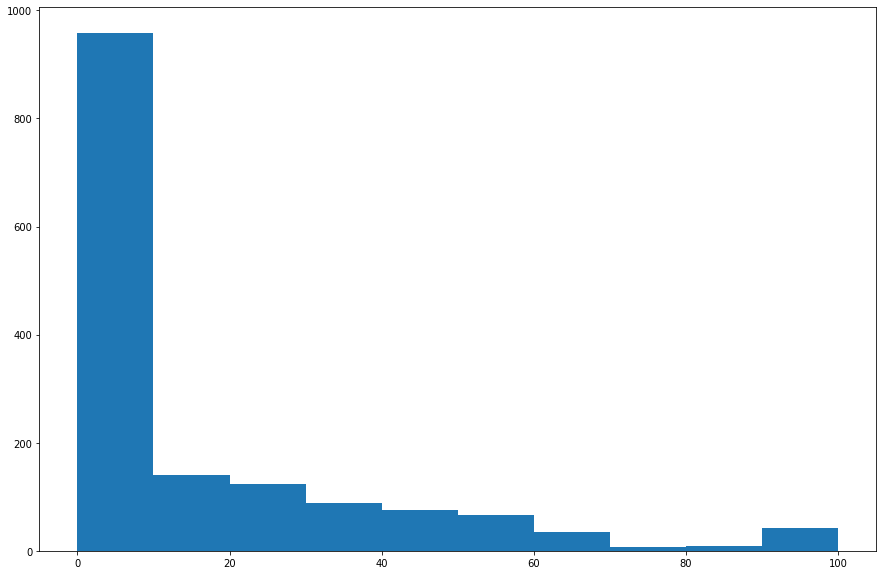

In [108]:
plt.figure(figsize=(15, 10))
plt.hist(grouped_df['ratio'])
plt.show()

In [109]:
# result_df = grouped_df.groupby('hostname').apply(lambda x: np.average(x['ratio'], weights=x['num_impressions']))
# result_df

# groupby and aggregate
result_df = grouped_df.groupby(['hostname']).apply(
    lambda x: pd.Series(
        {
            'fixation_ratio' : np.average(x['ratio'], weights=x['num_impressions']),
            'num_impressions': np.sum(x['num_impressions'])
        }
    )
)
result_df = result_df.reset_index()
result_df

,hostname,fixation_ratio,num_impressions
0,affarsvarlden.se,7.453410,966.0
1,aftonbladet.se,14.272985,442368.0
2,aikhockey.se,7.142850,14.0
3,aktivtraning.se,6.081102,148.0
4,alingsastidning.se,0.000000,25.0
...,...,...,...
391,woxikon.se,11.111100,9.0
392,wsj.com,14.285743,7.0
393,yahoo.com,33.333333,3.0
394,youtube.com,12.551629,591994.0


In [110]:
def get_sample_size(num_impressions):
    if num_impressions <= 20:
        return "low"
    elif num_impressions > 20 and num_impressions <= 100:
        return "medium"
    else:
        return "high"
    
result_df['sample_size'] = result_df['num_impressions'].apply(lambda num_impressions: get_sample_size(num_impressions))
result_df

,hostname,fixation_ratio,num_impressions,sample_size
0,affarsvarlden.se,7.453410,966.0,high
1,aftonbladet.se,14.272985,442368.0,high
2,aikhockey.se,7.142850,14.0,low
3,aktivtraning.se,6.081102,148.0,high
4,alingsastidning.se,0.000000,25.0,medium
...,...,...,...,...
391,woxikon.se,11.111100,9.0,low
392,wsj.com,14.285743,7.0,low
393,yahoo.com,33.333333,3.0,low
394,youtube.com,12.551629,591994.0,high


In [111]:
result_df['sample_size'].value_counts()

high      191
low       114
medium     91
Name: sample_size, dtype: int64

In [112]:
result_df = result_df[['hostname', 'fixation_ratio', 'sample_size']]

In [113]:
result_df.to_csv('tre_report_v1.csv', index=False)

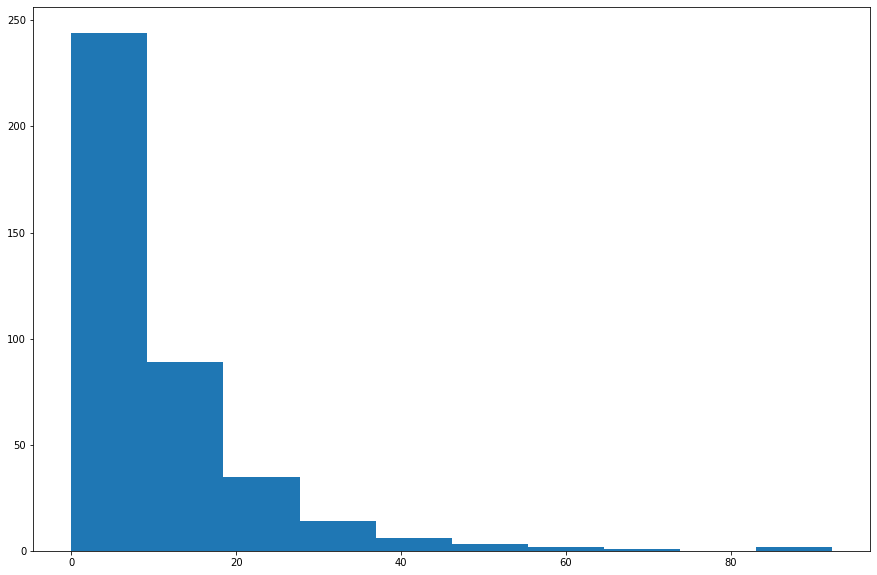

In [114]:
plt.figure(figsize=(15, 10))
plt.hist(result_df['fixation_ratio'])
plt.show()